In [1]:
!python --version

Python 3.7.12


**Julien VALENTIN**, **Décembre 2021**.

In [2]:
from matplotlib import pyplot
import numpy
import scipy.optimize

# Equations différentielles ordinaires linéaires d'ordre 1

Sur le segment $[0, T]$, on considère le problème
\begin{equation}
\left\{
\begin{array}{lr}
\dfrac{d u}{dt}(t) = f(t) & (0, T) \\
u(0) = u_0
\end{array}
\right.
\end{equation}

Soit $u : \mathbb{R} \rightarrow \mathbb{R}, t \mapsto e^t$. Cette fonction, analytique, vérifie le problème de Cauchy
\begin{equation}
\left\{
\begin{array}{lr}
\dfrac{d u}{dt}(t) = u(t) & (0, T) \\
u(0) = 1
\end{array}
\right.
\end{equation}

Soit $T = 1$.

## Discrétisation et mise en place

In [3]:
T = 1.
n = 64
dt = T/n
I = numpy.linspace(0, T, n+1)

@numpy.vectorize
def u( t: float ) -> float:
    "Solution exacte."
    return numpy.exp(t)

u_e = u(I)

@numpy.vectorize
def f( t: float ) -> float:
    "Second membre"
    return numpy.exp(t)

## Méthode d'Euler explicite

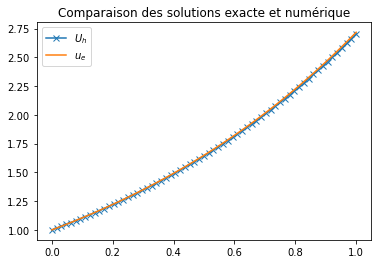

In [4]:
U_h    = numpy.zeros(n+1)
U_h[0] = u(0)

for nt in range(n):

    U_h[nt+1] = U_h[nt] + dt * f(I[nt])

pyplot.plot(I, U_h, label="$U_h$", marker="x")
pyplot.plot(I, u_e, label="$u_e$")
pyplot.legend(loc='best')
pyplot.title("Comparaison des solutions exacte et numérique")
pyplot.show()

---

## Un second problème

Sur $[0, T]$, on pose maintenant 
\begin{equation}
\left\{
\begin{array}{lr}
\frac{d u}{dt}(t) = f(t, u(t)) & (0, T) \\
u(0) = u_0 \in \mathbb{R}
\end{array}
\right.
\end{equation}

La fonction $ u(t) = e^{t^2 / 2} $ vérifie par exemple
\begin{equation}
\left\{
\begin{array}{lr}
\frac{d u}{dt}(t) = t u(t) & (0, T) \\
u(0) = 1
\end{array}
\right.
\end{equation}


On fixe toujours $T=1$.

In [5]:
T = 1.
n = 64
dt = T/n
I = numpy.linspace(0, T, n+1)

@numpy.vectorize
def u( t: float ) -> float:
    "Solution exacte."
    return numpy.exp(t**2 / 2)

u_e = u(I)

@numpy.vectorize
def f( t: float, u: float ) -> float:
    "Second membre"
    return t * u

### Euler explicite

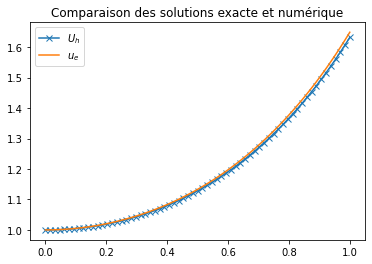

In [6]:
U_h    = numpy.zeros(n+1)
U_h[0] = u(0)

for nt in range(n):

    U_h[nt+1] = U_h[nt] + dt * f(I[nt], U_h[nt])

pyplot.plot(I, U_h, label="$U_h$", marker="x")
pyplot.plot(I, u_e, label="$u_e$")
pyplot.legend(loc='best')
pyplot.title("Comparaison des solutions exacte et numérique")
pyplot.show()

### Euler implicite

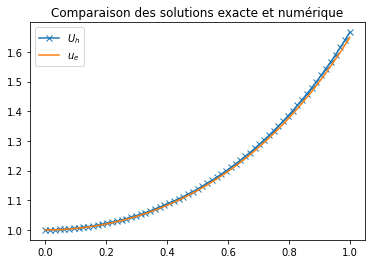

In [7]:
U_h    = numpy.zeros(n+1)
U_h[0] = u(0)

for nt in range(n):

    U_h[nt+1] = scipy.optimize.fsolve( lambda u: u - U_h[nt] - dt*f(I[nt+1], u), U_h[nt] )

pyplot.plot(I, U_h, label="$U_h$", marker="x")
pyplot.plot(I, u_e, label="$u_e$")
pyplot.legend(loc='best')
pyplot.title("Comparaison des solutions exacte et numérique")
pyplot.show()

### Runge-Kutta 2

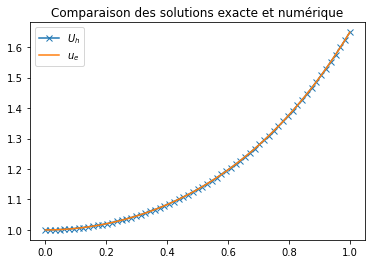

In [8]:
U_h    = numpy.zeros(n+1)
U_h[0] = u(0)

for nt in range(n):

    k1 = U_h[nt] + dt/2 * f( I[nt], U_h[nt] )
    k2 = f( I[nt]+dt/2, k1 )
    U_h[nt+1] = U_h[nt] + dt * k2

pyplot.plot(I, U_h, label="$U_h$", marker="x")
pyplot.plot(I, u_e, label="$u_e$")
pyplot.legend(loc='best')
pyplot.title("Comparaison des solutions exacte et numérique")
pyplot.show()

### Runge-Kutta 4

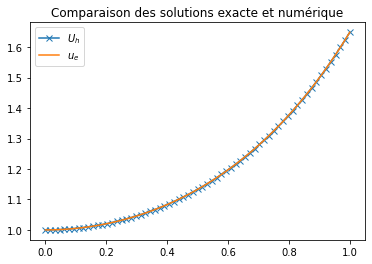

In [9]:
U_h    = numpy.zeros(n+1)
U_h[0] = u(0)

for nt in range(n):

    k1 = f( I[nt], U_h[nt] )
    k2 = f( I[nt]+dt/2, U_h[nt]+dt*k1/2 )
    k3 = f( I[nt]+dt/2, U_h[nt]+dt*k2/2 )
    k4 = f( I[nt]+dt  , U_h[nt]+dt*k3   )

    U_h[nt+1] = U_h[nt] + dt/6 * ( k1 + 2*k2 + 2*k3 + k4 )

pyplot.plot(I, U_h, label="$U_h$", marker="x")
pyplot.plot(I, u_e, label="$u_e$")
pyplot.legend(loc='best')
pyplot.title("Comparaison des solutions exacte et numérique")
pyplot.show()

### Convergence des schéma

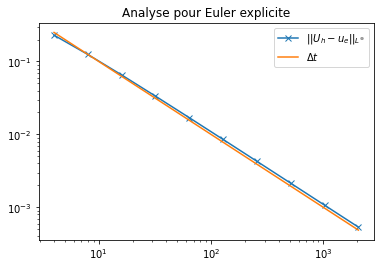

In [10]:
T = 1.

n_  = numpy.array([2**i for i in range(2, 12)])
dt_ = 1/n_
err = numpy.zeros(n_.shape)

@numpy.vectorize
def u( t: float ) -> float:
    "Solution exacte."
    return numpy.exp(t**2 / 2)

@numpy.vectorize
def f( t: float, u: float ) -> float:
    "Second membre"
    return t * u

for a, n in enumerate(n_):

    I = numpy.linspace(0, T, n+1)
    u_e = u(I)

    dt = dt_[a]

    U_h    = numpy.zeros(n+1)
    U_h[0] = u(0)

    for nt in range(n):

        U_h[nt+1] = U_h[nt] + dt * f(I[nt], U_h[nt])

    err[a] = numpy.max(numpy.abs(U_h - u_e))

pyplot.loglog(n_, err, label="$|| U_h - u_e ||_{L^\infty}$", marker="x")
pyplot.loglog(n_, dt_, label="$\Delta t$")
pyplot.legend()
pyplot.title("Analyse pour Euler explicite")
pyplot.show()

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


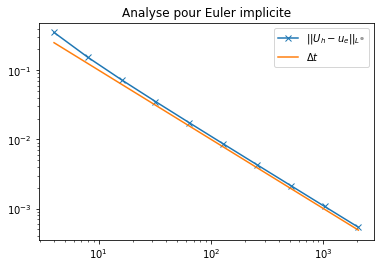

In [11]:
T = 1.

n_  = numpy.array([2**i for i in range(2, 12)])
dt_ = 1/n_
err = numpy.zeros(n_.shape)

@numpy.vectorize
def u( t: float ) -> float:
    "Solution exacte."
    return numpy.exp(t**2 / 2)

@numpy.vectorize
def f( t: float, u: float ) -> float:
    "Second membre"
    return t * u

for a, n in enumerate(n_):

    I = numpy.linspace(0, T, n+1)
    u_e = u(I)

    dt = dt_[a]

    U_h    = numpy.zeros(n+1)
    U_h[0] = u(0)

    for nt in range(n):

        U_h[nt+1] = scipy.optimize.fsolve( lambda u: u - U_h[nt] - dt*f(I[nt+1], u), U_h[nt] )

    err[a] = numpy.max(numpy.abs(U_h - u_e))

pyplot.loglog(n_, err, label="$|| U_h - u_e ||_{L^\infty}$", marker="x")
pyplot.loglog(n_, dt_, label="$\Delta t$")
pyplot.legend()
pyplot.title("Analyse pour Euler implicite")
pyplot.show()

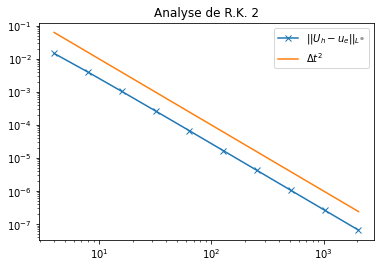

In [12]:
T = 1.

n_  = numpy.array([2**i for i in range(2, 12)])
dt_ = 1/n_
err = numpy.zeros(n_.shape)

@numpy.vectorize
def u( t: float ) -> float:
    "Solution exacte."
    return numpy.exp(t**2 / 2)

@numpy.vectorize
def f( t: float, u: float ) -> float:
    "Second membre"
    return t * u

for a, n in enumerate(n_):

    I = numpy.linspace(0, T, n+1)
    u_e = u(I)

    dt = dt_[a]

    U_h    = numpy.zeros(n+1)
    U_h[0] = u(0)

    for nt in range(n):

        k1 = U_h[nt] + dt/2 * f( I[nt], U_h[nt] )
        k2 = f( I[nt]+dt/2, k1 )
        U_h[nt+1] = U_h[nt] + dt * k2

    err[a] = numpy.max(numpy.abs(U_h - u_e))

pyplot.loglog(n_, err, label="$|| U_h - u_e ||_{L^\infty}$", marker="x")
pyplot.loglog(n_, dt_**2, label="$\Delta t^2$")
pyplot.legend()
pyplot.title("Analyse de R.K. 2")
pyplot.show()

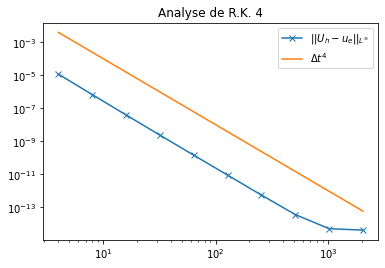

In [13]:
T = 1.

n_  = numpy.array([2**i for i in range(2, 12)])
dt_ = 1/n_
err = numpy.zeros(n_.shape)

@numpy.vectorize
def u( t: float ) -> float:
    "Solution exacte."
    return numpy.exp(t**2 / 2)

@numpy.vectorize
def f( t: float, u: float ) -> float:
    "Second membre"
    return t * u

for a, n in enumerate(n_):

    I = numpy.linspace(0, T, n+1)
    u_e = u(I)

    dt = dt_[a]

    U_h    = numpy.zeros(n+1)
    U_h[0] = u(0)

    for nt in range(n):
        
        k1 = f( I[nt], U_h[nt] )
        k2 = f( I[nt]+dt/2, U_h[nt]+dt*k1/2 )
        k3 = f( I[nt]+dt/2, U_h[nt]+dt*k2/2 )
        k4 = f( I[nt]+dt  , U_h[nt]+dt*k3   )

        U_h[nt+1] = U_h[nt] + dt/6 * ( k1 + 2*k2 + 2*k3 + k4 )

    err[a] = numpy.max(numpy.abs(U_h - u_e))

pyplot.loglog(n_, err, label="$|| U_h - u_e ||_{L^\infty}$", marker="x")
pyplot.loglog(n_, dt_**4, label="$\Delta t^4$")
pyplot.legend()
pyplot.title("Analyse de R.K. 4")
pyplot.show()

# Un système non-linéaire d'ordre 1

On se penche maintenant sur le fameux système dynamique de Lorenz. Il se formule ainsi
\begin{equation}
\left\{
\begin{array}{rcl}
\frac{dx}{dt}(t) & = & \sigma \left[ y(t) - x(t) \right] \\
\frac{dy}{dt}(t) & = & \rho x(t) - y(t) - x(t) z(t) \\
\frac{dz}{dt}(t) & = & x(t) y(t) - \beta z(t)
\end{array}
\right.
\end{equation}

On commence par choisir un triplet de paramètres

In [14]:
sigma = 10
beta  = 2.667
rho   = 28

on choisit ensuite un état initial

In [15]:
u0 = 0.
v0 = 1.
w0 = 1.05

on poursuit par l'implémentation du second membre de l'équation

In [16]:
def lorenz(t: float, X: numpy.ndarray, sigma: float, beta: float, rho: float) -> numpy.ndarray:
    "Système de Lorenz"
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

on peut maintenant discrétiser le segment de temps.

In [17]:
T = 100
n = 10000

## Avec `odeint` de `scipy.integrate`

In [18]:
from scipy.integrate import odeint

Intégrons l'équation sur l'intervalle $[0, T]$.

In [19]:
Uh = odeint(lorenz, (u0, v0, w0), numpy.linspace(0, T, n+1), args=(sigma, beta, rho), tfirst=True)

x, y, z = Uh[:, 0], Uh[:, 1], Uh[:, 2]

Et on trace la trajectoire du mobile en fonction du temps.

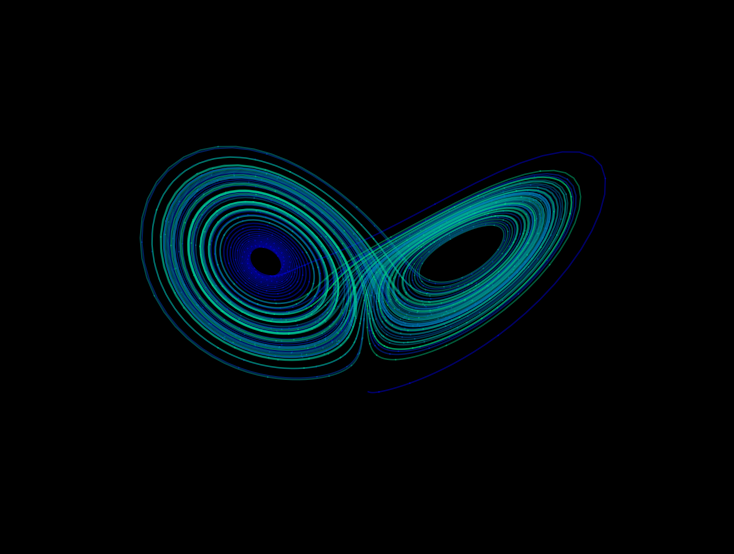

In [20]:
from mpl_toolkits.mplot3d import Axes3D

WIDTH, HEIGHT, DPI = 1000, 750, 100

fig = pyplot.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

s = 10
cmap = pyplot.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

ax.set_axis_off()

pyplot.savefig('lorenz.png', dpi=DPI)
pyplot.show()

## Avec `solve_ivp` de `scipy.integrate`

In [21]:
from scipy.integrate import solve_ivp

In [22]:
Vh = solve_ivp(lorenz, (0, T), (u0, v0, w0), args=(sigma, beta, rho), dense_output=True)

t = numpy.linspace(0, T, n)
x, y, z = Vh.sol(t)

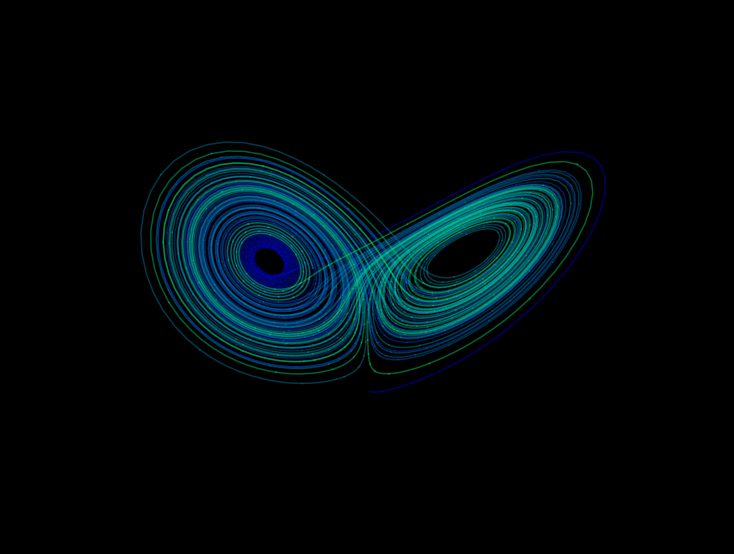

In [23]:
fig = pyplot.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

s = 10
cmap = pyplot.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

ax.set_axis_off()

pyplot.savefig('lorenz.png', dpi=DPI)
pyplot.show()